# Data Understanding

In [168]:
# import library
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [169]:
# load data
train= pd.read_csv("Data Train.csv")
test = pd.read_csv("Data Test.csv")

In [170]:
# show data
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [171]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


data test tidak mempunyai kolom churn tetapi ada kolom id

In [172]:
print(train.shape, test.shape)

(4250, 20) (750, 20)


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [174]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [175]:
numerical = train.select_dtypes(exclude=['object']).columns
categorical = train.select_dtypes(include=['object']).columns

In [176]:
train[categorical].nunique()

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

In [177]:
# encode 
train['international_plan'] = LabelEncoder().fit_transform(train['international_plan'])
train['voice_mail_plan'] = LabelEncoder().fit_transform(train['voice_mail_plan'])
train['churn'] = LabelEncoder().fit_transform(train['churn'])

In [178]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# Exploratory Data Analysis

0    3652
1     598
Name: churn, dtype: int64

0    85.929412
1    14.070588
Name: churn, dtype: float64

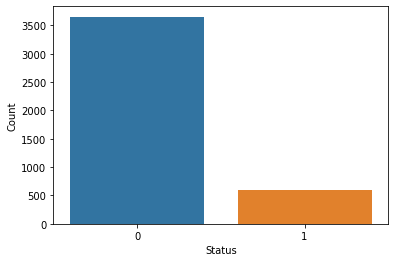

In [179]:
feature_agg = train["churn"].value_counts()
percentage = (feature_agg/len(train["churn"])*100)
feature_index = feature_agg.index
feature_values = feature_agg.values
display(feature_agg)
display(percentage)
sns.barplot(x = feature_index, y = feature_values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

perbedaan persebaran data yang churn dan tidak churn terlalu jauh

In [180]:
def target_mean_agg(features, target, data):
    usecol = features+target
    df_agg = train[usecol].groupby(features).agg([np.mean, "count"])
    return df_agg.sort_values([("churn", "mean")], ascending=False).head()

In [181]:
target_mean_agg(["state"], ["churn"], train)

churn      
           mean count
state                
NJ     0.270833    96
CA     0.256410    39
WA     0.225000    80
MD     0.220930    86
MT     0.212500    80

churn      
                   mean count
area_code                    
area_code_510  0.150568  1056
area_code_408  0.139963  1086
area_code_415  0.136148  2108

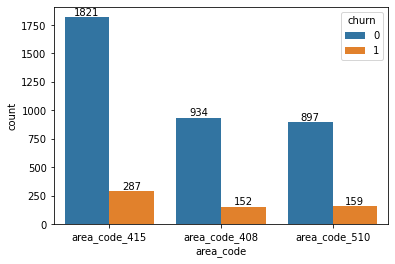

In [182]:
ax = sns.countplot(x=train["area_code"], hue=train["churn"])

for i in ax.containers:
    ax.bar_label(i)
    
display(target_mean_agg(["area_code"], ["churn"], train))


churn      
                        mean count
international_plan                
1                   0.421717   396
0                   0.111832  3854

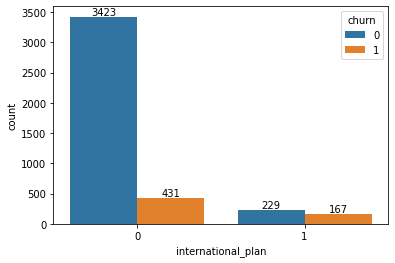

In [183]:
ax = sns.countplot(x=train["international_plan"], hue=train["churn"])

for i in ax.containers:
    ax.bar_label(i)
    
display(target_mean_agg(["international_plan"], ["churn"], train))

churn      
                     mean count
voice_mail_plan                
0                0.164436  3138
1                0.073741  1112

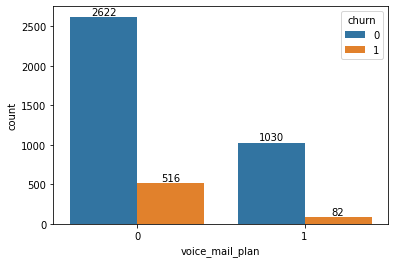

In [184]:
ax = sns.countplot(x=train["voice_mail_plan"], hue=train["churn"])

for i in ax.containers:
    ax.bar_label(i)
    
display(target_mean_agg(["voice_mail_plan"], ["churn"], train))

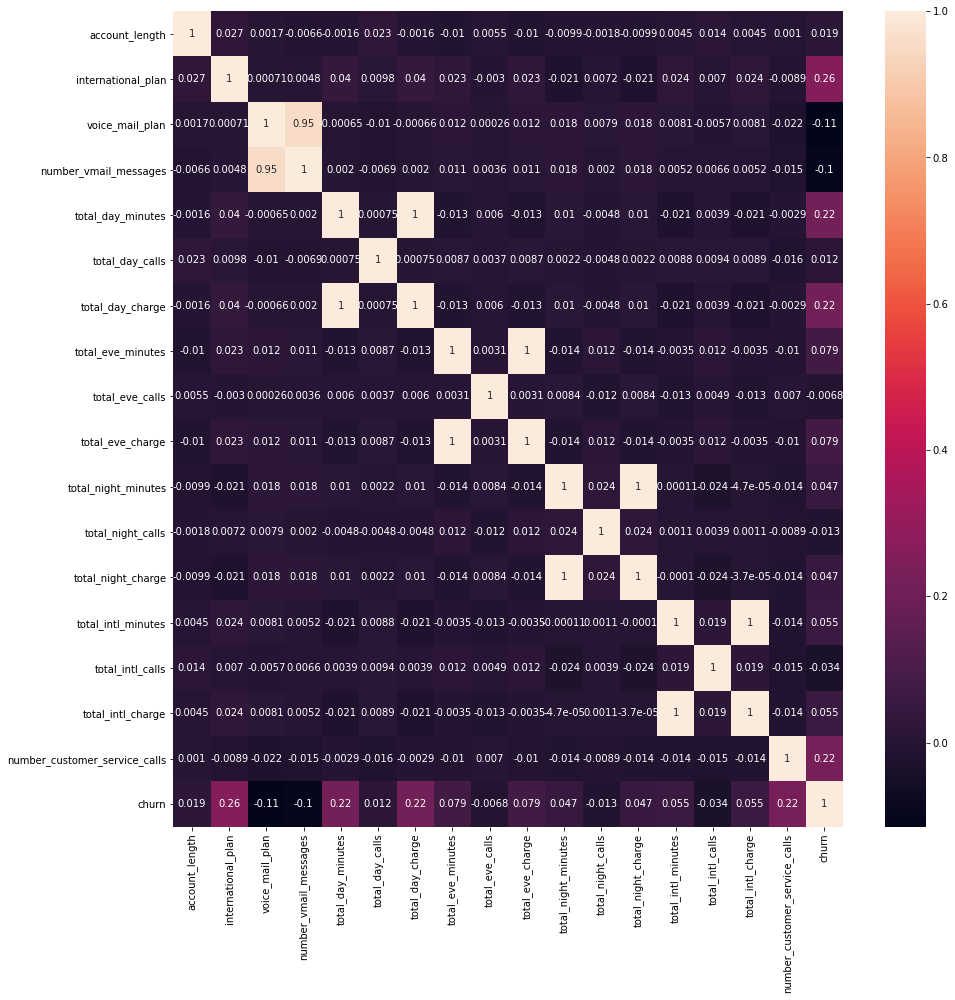

In [185]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot = True)
plt.show()

dapat dilihat bahwa ada beberapa feature yang memiliki korelasi tinggi seperti feature total_day_calls dengan total_day_charge, total_eve_calls dengan total_eve_charge, total_night_calls dengan total_night_charge, total_intl_calls dengan total_intl_charge dan voice_mail_plan dengan number_vmail_messages

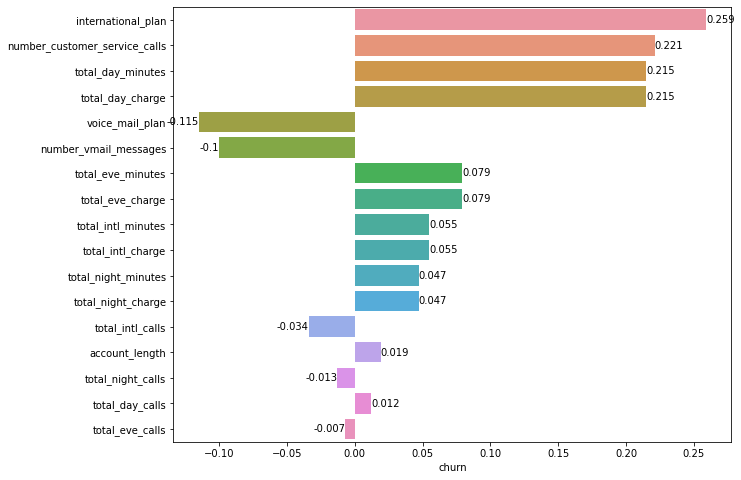

In [186]:
def feature_cor_with_target(target="churn", data=train):    
    usecol = [c for c in train.corr().columns if c != "churn"]
    x=[]
    if x != []:
        usecol = [c for c in usecol if c in x]
    else:
        pass

    df_corr = pd.DataFrame(train.corr()["churn"].loc[usecol])
    df_corr["churn"+"_abs"] = np.abs(df_corr["churn"])
    df_corr = df_corr.sort_values("churn"+"_abs", ascending=False)

    plt.figure(figsize = (10, 8))
    ax = sns.barplot(y=df_corr.index, x=round(df_corr["churn"], 3))
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()
    
feature_cor_with_target(target="churn", data=train)

dapat dilihat bahwa semakin tinggi interntional_plan, number_customer_service_call dan total_day_minutes maka kemungkinan churn nya semakin tinggi dan ketika voice_mail_plain tinggi maka kemungkinan untuk tidak churn semakin tinggi pula.
lalu untuk feature total_day_calls, total_eve_calls, total_night_calls, dan account_length memiliki kecenderungan churn atau tidak churn sangat rendah

# Data Preparation

In [187]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [188]:
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [189]:
train.duplicated().sum()

0

In [190]:
test.duplicated().sum()

0

dataset sudah bersih tidak ada missing falue dan duplikat data

### Feature Engineering

#### Encode

In [191]:
def target_mean_encoding(features,target,train):
  df_encoding = train[[features,target]].groupby(features).mean()
  df_encoding.rename(columns={target:features+"_proba"},inplace=True)
  df_merge = pd.merge(train, df_encoding, on = features, how="inner")
  return df_merge

train = target_mean_encoding(features="state",target="churn",train=train)
train = target_mean_encoding(features="area_code",target="churn",train=train)

In [192]:
def target_mean_encoding_test(features,target,test):
  df_encoding = train[[features,target]].groupby(features).mean()
  df_encoding.rename(columns={target:features+"_proba"},inplace=True)
  df_merge = pd.merge(test, df_encoding, on = features, how="inner")
  return df_merge

test = target_mean_encoding_test(features="state",target="churn",test=test)
test = target_mean_encoding_test(features="area_code",target="churn",test=test)

In [193]:
# encode 
test['international_plan'] = LabelEncoder().fit_transform(test['international_plan'])
test['voice_mail_plan'] = LabelEncoder().fit_transform(test['voice_mail_plan'])

In [194]:
features_drop = ['state','area_code', 'account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [195]:
train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba,area_code_proba
0,0,1,26,27.47,16.62,11.45,3,3.70,1,0,0.126316,0.136148
1,0,0,0,57.36,19.33,6.93,7,4.27,0,1,0.126316,0.136148
2,1,1,36,33.83,24.76,8.89,6,2.97,1,0,0.126316,0.136148
3,0,1,36,24.09,19.75,9.99,5,3.24,1,0,0.126316,0.136148
4,0,1,18,18.09,9.19,9.38,5,2.73,1,0,0.126316,0.136148


In [196]:
test.head()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba
0,1,0,1,25,45.07,16.78,11.01,3,2.70,1,0.172414,0.136148
1,117,0,0,0,32.27,16.77,10.55,3,4.02,2,0.172414,0.136148
2,450,0,0,0,35.29,21.39,8.62,6,2.94,2,0.172414,0.136148
3,692,1,0,0,34.00,17.46,14.57,2,2.40,0,0.172414,0.136148
4,733,0,0,0,39.59,16.24,10.01,3,2.89,0,0.172414,0.136148


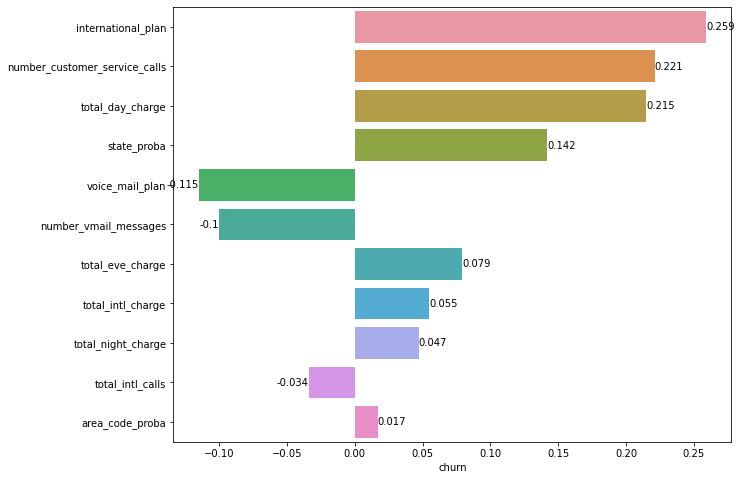

In [197]:
feature_cor_with_target()

#### Scaling

In [198]:
train.describe()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba,area_code_proba
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.093176,0.261647,7.631765,30.644682,17.015012,9.023892,4.426353,2.769654,1.559059,0.140706,0.140706,0.140706
std,0.290714,0.439583,13.439882,9.182096,4.271212,2.265922,2.463069,0.745204,1.311434,0.347759,0.049467,0.005884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.136148
25%,0.000000,0.000000,0.000000,24.365000,14.102500,7.522500,3.000000,2.300000,1.000000,0.000000,0.111111,0.136148
50%,0.000000,0.000000,0.000000,30.680000,17.060000,9.020000,4.000000,2.780000,1.000000,0.000000,0.136691,0.139963
75%,0.000000,1.000000,16.000000,36.750000,19.867500,10.560000,6.000000,3.240000,2.000000,0.000000,0.172414,0.139963
max,1.000000,1.000000,52.000000,59.760000,30.540000,17.770000,20.000000,5.400000,9.000000,1.000000,0.270833,0.150568


In [199]:
test.describe()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,0.102667,0.281333,8.454667,30.677920,17.277080,8.982827,4.485333,2.779933,1.634667,0.142578,0.140681
std,216.65064,0.303726,0.449950,14.123712,9.053756,4.435638,2.318920,2.421901,0.747704,1.276207,0.050019,0.005961
min,1.00000,0.000000,0.000000,0.000000,2.130000,2.650000,2.290000,0.000000,0.000000,0.000000,0.050000,0.136148
25%,188.25000,0.000000,0.000000,0.000000,24.925000,14.177500,7.402500,3.000000,2.305000,1.000000,0.111111,0.136148
50%,375.50000,0.000000,0.000000,0.000000,30.295000,17.285000,8.975000,4.000000,2.780000,1.000000,0.132702,0.136148
75%,562.75000,0.000000,1.000000,21.000000,36.715000,20.057500,10.565000,6.000000,3.270000,2.000000,0.172414,0.150568
max,750.00000,1.000000,1.000000,51.000000,59.640000,30.910000,16.390000,19.000000,5.100000,6.000000,0.270833,0.150568


In [200]:
usecol_scale = ['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_charge', 
                      'total_eve_charge', 'total_night_charge', 'total_intl_calls', 'total_intl_charge',
                      'number_customer_service_calls', 'state_proba', 'area_code_proba']

scaler = StandardScaler()
train[usecol_scale] = scaler.fit_transform(train[usecol_scale])
test[usecol_scale] = scaler.transform(test[usecol_scale])

In [201]:
train.describe()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba,area_code_proba
count,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4250.000000,4.250000e+03,4.250000e+03
mean,-5.192187e-16,2.224887e-16,5.940346e-17,-1.497364e-16,8.814910e-16,3.365151e-16,-4.143091e-16,5.804768e-16,1.035773e-16,0.140706,-2.769027e-17,5.637425e-15
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,0.347759,1.000118e+00,1.000118e+00
min,-3.205470e-01,-5.952863e-01,-5.679114e-01,-3.337831e+00,-3.984118e+00,-3.982906e+00,-1.797300e+00,-3.717075e+00,-1.188960e+00,0.000000,-1.833875e+00,-7.747226e-01
25%,-3.205470e-01,-5.952863e-01,-5.679114e-01,-6.839856e-01,-6.819738e-01,-6.626744e-01,-5.791639e-01,-6.303097e-01,-4.263461e-01,0.000000,-5.983415e-01,-7.747226e-01
50%,-3.205470e-01,-5.952863e-01,-5.679114e-01,3.846813e-03,1.053414e-02,-1.717722e-03,-1.731186e-01,1.388492e-02,-4.263461e-01,0.000000,-8.117927e-02,-1.262426e-01
75%,-3.205470e-01,1.679864e+00,6.227153e-01,6.649937e-01,6.679191e-01,6.779974e-01,6.389720e-01,6.312381e-01,3.362679e-01,0.000000,6.410646e-01,-1.262426e-01
max,3.119667e+00,1.679864e+00,3.301625e+00,3.171252e+00,3.166918e+00,3.860300e+00,6.323606e+00,3.530114e+00,5.674566e+00,1.000000,2.630892e+00,1.676340e+00


In [202]:
test.describe()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,0.032648,0.044789,0.061236,0.003620,0.061364,-0.018125,0.023949,0.013795,0.057660,0.037854,-0.004204
std,216.65064,1.044881,1.023703,1.051004,0.986139,1.038619,1.023510,0.983402,1.003472,0.973253,1.011272,1.013224
min,1.00000,-0.320547,-0.595286,-0.567911,-3.105831,-3.363613,-2.972161,-1.797300,-3.717075,-1.188960,-1.833875,-0.774723
25%,188.25000,-0.320547,-0.595286,-0.567911,-0.622990,-0.664412,-0.715639,-0.579164,-0.623599,-0.426346,-0.598342,-0.774723
50%,375.50000,-0.320547,-0.595286,-0.567911,-0.038088,0.063219,-0.021580,-0.173119,0.013885,-0.426346,-0.161826,-0.774723
75%,562.75000,-0.320547,1.679864,0.994786,0.661181,0.712408,0.680204,0.638972,0.671500,0.336268,0.641065,1.676340
max,750.00000,3.119667,1.679864,3.227211,3.158182,3.253555,3.251204,5.917561,3.127492,3.386724,2.630892,1.676340


In [203]:
train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba,area_code_proba
0,-0.320547,1.679864,1.366857,-0.345788,-0.092493,1.070820,-0.579164,1.248591,-0.426346,0,-0.290936,-0.774723
1,-0.320547,-0.595286,-0.567911,2.909843,0.542062,-0.924188,1.045017,2.013572,-1.188960,1,-0.290936,-0.774723
2,3.119667,1.679864,2.110999,0.346946,1.813513,-0.059096,0.638972,0.268879,-0.426346,0,-0.290936,-0.774723
3,-0.320547,1.679864,2.110999,-0.713939,0.640406,0.426414,0.232927,0.631238,-0.426346,0,-0.290936,-0.774723
4,-0.320547,1.679864,0.771544,-1.367461,-1.832251,0.157177,0.232927,-0.053219,-0.426346,0,-0.290936,-0.774723


In [204]:
test.head()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba
0,1,-0.320547,1.679864,1.292443,1.571212,-0.055029,0.876615,-0.579164,-0.093481,-0.426346,0.641065,-0.774723
1,117,-0.320547,-0.595286,-0.567911,0.177030,-0.057370,0.673584,-0.579164,1.678054,0.336268,0.641065,-0.774723
2,450,-0.320547,-0.595286,-0.567911,0.505970,1.024417,-0.178267,0.638972,0.228616,0.336268,0.641065,-0.774723
3,692,3.119667,-0.595286,-0.567911,0.365463,0.104195,2.447905,-0.985209,-0.496102,-1.188960,0.641065,-0.774723
4,733,-0.320547,-0.595286,-0.567911,0.974328,-0.181471,0.435242,-0.579164,0.161513,-1.188960,0.641065,-0.774723


In [205]:
print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in train:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df_train = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')
print(f'Jumlah outlier: {len(train)-len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3687
Jumlah outlier: 563


# Modelling

#### train test split

In [206]:
drop_col = []
target_col = ["churn"]
X = df_train.drop(drop_col+target_col, axis=1)
y = df_train[target_col]
print(X.shape, y.shape)

(3687, 11) (3687, 1)


In [207]:
y.value_counts()

churn
0        3292
1         395
dtype: int64

In [208]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 42
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

print("data train : ",X_train.shape, Y_train.shape)
print("data test : ",X_val.shape, Y_val.shape)

data train :  (2470, 11) (2470, 1)
data test :  (1217, 11) (1217, 1)


In [209]:
over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, Y_train = over.fit_resample(X_train, Y_train)

Y_train.value_counts()

churn
1        2205
0        2205
dtype: int64

In [210]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [211]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_nb = GaussianNB()

print("Run Logistics Regression")
model_lr.fit(X_train, Y_train)
print("Run Decision Tree")
model_dt.fit(X_train, Y_train)
print("Run Random Forest")
model_rf.fit(X_train, Y_train)
print("Run Gradient Boosting")
model_gb.fit(X_train, Y_train)
print("Run Naive Bayes")
model_nb.fit(X_train, Y_train)

Run Logistics Regression
Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes


GaussianNB()

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
score_train = []
score_test = []
precisions = []
recalls = []
aucs = []
f1_scores = []

for model in model_list:
    open_model = eval(model)
    y_train_pred = open_model.predict(X_train)
    y_val_pred = open_model.predict(X_val)
    
    score_train.append(accuracy_score(Y_train, y_train_pred))
    score_test.append(accuracy_score(Y_val, y_val_pred))
    precisions.append(precision_score(Y_val, y_val_pred))
    recalls.append(recall_score(Y_val, y_val_pred))
    aucs.append(roc_auc_score(Y_val, y_val_pred))
    f1_scores.append(f1_score(Y_val, y_val_pred))

df_eval = pd.DataFrame()
df_eval["model"] = model_list
df_eval["acc_train"] = score_train
df_eval["acc_test"] = score_test
df_eval["precision"] = precisions
df_eval["recall"] = recalls
df_eval["auc"] = aucs
df_eval["f1_score"] = f1_scores

df_eval

,model,acc_train,acc_test,precision,recall,auc,f1_score
0,model_lr,0.780726,0.763353,0.287634,0.823077,0.789643,0.426295
1,model_dt,1.000000,0.890715,0.492683,0.776923,0.840623,0.602985
2,model_rf,1.000000,0.956450,0.798450,0.792308,0.884194,0.795367
3,model_gb,0.961678,0.945768,0.735294,0.769231,0.868056,0.751880
4,model_nb,0.715873,0.656532,0.219844,0.869231,0.750163,0.350932


#### Select model

saya akan memakai model Gradient Boosting dikarenakan model tersebut mendapatkan score terbaik dan tidak ovetvit

In [217]:
def train_model(X,y):
    model_gb = GradientBoostingClassifier()
    model_gb.fit(X,y)
    return model_gb
model_churn = train_model(X,y)

#### Predict data test

In [218]:
df_test = test.drop("id", axis=1)

In [219]:
df_test.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba
0,-0.320547,1.679864,1.292443,1.571212,-0.055029,0.876615,-0.579164,-0.093481,-0.426346,0.641065,-0.774723
1,-0.320547,-0.595286,-0.567911,0.177030,-0.057370,0.673584,-0.579164,1.678054,0.336268,0.641065,-0.774723
2,-0.320547,-0.595286,-0.567911,0.505970,1.024417,-0.178267,0.638972,0.228616,0.336268,0.641065,-0.774723
3,3.119667,-0.595286,-0.567911,0.365463,0.104195,2.447905,-0.985209,-0.496102,-1.188960,0.641065,-0.774723
4,-0.320547,-0.595286,-0.567911,0.974328,-0.181471,0.435242,-0.579164,0.161513,-1.188960,0.641065,-0.774723


In [220]:
X.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba
0,-0.320547,1.679864,1.366857,-0.345788,-0.092493,1.070820,-0.579164,1.248591,-0.426346,-0.290936,-0.774723
1,-0.320547,-0.595286,-0.567911,2.909843,0.542062,-0.924188,1.045017,2.013572,-1.188960,-0.290936,-0.774723
3,-0.320547,1.679864,2.110999,-0.713939,0.640406,0.426414,0.232927,0.631238,-0.426346,-0.290936,-0.774723
4,-0.320547,1.679864,0.771544,-1.367461,-1.832251,0.157177,0.232927,-0.053219,-0.426346,-0.290936,-0.774723
5,-0.320547,1.679864,1.738928,-0.687798,0.724701,0.541172,0.232927,0.416507,0.336268,-0.290936,-0.774723


In [221]:
test["churn"] = model_churn.predict(df_test)

In [247]:
test.head(20)

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,area_code_proba,churn
0,1,-0.320547,1.679864,1.292443,1.571212,-0.055029,0.876615,-0.579164,-0.093481,-0.426346,0.641065,-0.774723,0
1,117,-0.320547,-0.595286,-0.567911,0.177030,-0.057370,0.673584,-0.579164,1.678054,0.336268,0.641065,-0.774723,0
2,450,-0.320547,-0.595286,-0.567911,0.505970,1.024417,-0.178267,0.638972,0.228616,0.336268,0.641065,-0.774723,0
3,692,3.119667,-0.595286,-0.567911,0.365463,0.104195,2.447905,-0.985209,-0.496102,-1.188960,0.641065,-0.774723,0
4,733,-0.320547,-0.595286,-0.567911,0.974328,-0.181471,0.435242,-0.579164,0.161513,-1.188960,0.641065,-0.774723,0
5,42,-0.320547,-0.595286,-0.567911,0.220598,-0.628704,-1.206667,0.638972,-0.308212,-0.426346,-0.242472,-0.774723,0
6,86,-0.320547,-0.595286,-0.567911,-0.050613,1.736243,-0.398954,-0.579164,0.590976,0.336268,-0.242472,-0.774723,0
7,134,-0.320547,-0.595286,-0.567911,-0.041900,-0.923737,0.717721,-0.173119,0.523872,-0.426346,-0.242472,-0.774723,0
8,226,-0.320547,-0.595286,-0.567911,0.058307,0.745775,0.545585,0.232927,-0.455840,1.098882,-0.242472,-0.774723,0
9,331,-0.320547,1.679864,2.110999,1.159492,-0.581873,-0.460746,3.075244,-1.972382,-0.426346,-0.242472,-0.774723,0


#### model interpretetion

In [223]:
df_imp = pd.DataFrame()
df_imp["feature"] = X.columns.tolist()
df_imp["importance"] = model_churn.feature_importances_
df_imp.sort_values("importance", ascending=False)

,feature,importance
3,total_day_charge,0.449245
4,total_eve_charge,0.197775
8,number_customer_service_calls,0.171294
2,number_vmail_messages,0.077830
1,voice_mail_plan,0.052649
5,total_night_charge,0.028530
9,state_proba,0.009608
7,total_intl_charge,0.007444
6,total_intl_calls,0.004913
10,area_code_proba,0.000712


In [224]:
import shap

In [225]:
explainer = shap.Explainer(model_churn, X)
shap_values = explainer(df_test)

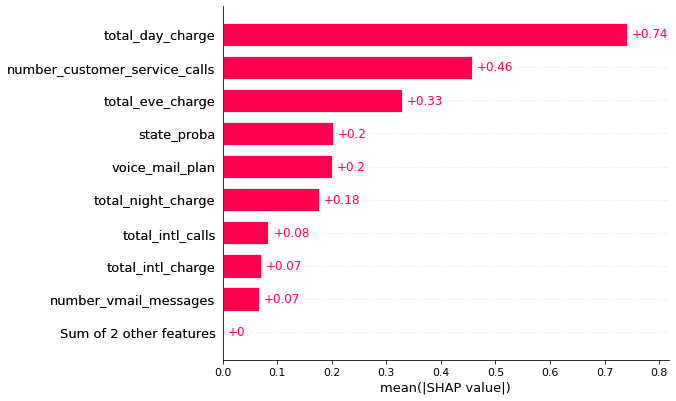

In [234]:
shap.plots.bar(shap_values)

# Quetion
## customer dengan nomor id 3 dan 42 apakah churn atau tidak ?

In [243]:
def predict_and_explain(data=test, id=1):
    df_test_id = test[test.id==id]
    f_drop = ['id', 'churn']
    df_test_id = df_test_id.drop(f_drop, axis=1) 
    df_test_pred = df_test_id
    prediction = model_churn.predict(df_test_pred)
    if prediction == 1:
        print("churn")
    else:
        print("not churn")
    shap_values = explainer(df_test_pred)
    shap.plots.bar(shap_values[0])

churn


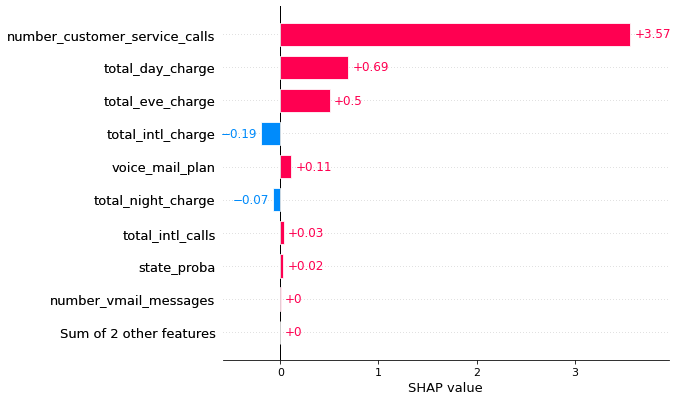

In [248]:
predict_and_explain(data=test, id=3)

customer dengan id 3 akan churn

not churn


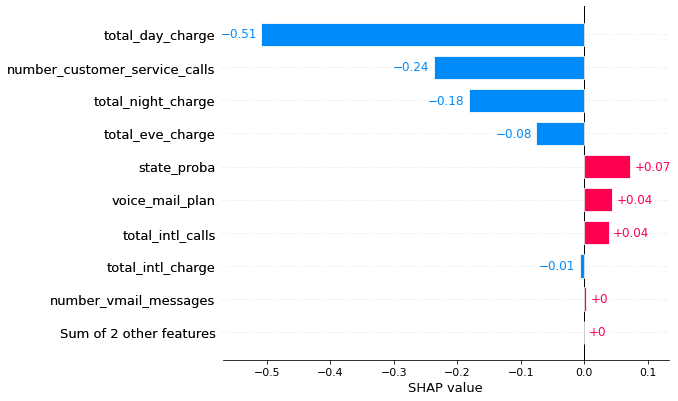

In [249]:
predict_and_explain(data=test, id=42)

customer dengan id 42 tidak churn